Enlace de del desarroyo mostrado en este cuaderno:      <a href="https://colab.research.google.com/github/JCardenas05/Teoria_Se-ales/blob/main/Taller_Final/Book_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab This NoteBook"/></a>

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [34]:
def load_data(path='Sonar.csv'):
    df = pd.read_csv(path)
    x = df.drop('Class', axis=1).to_numpy()
    y = df['Class']
    print(f'Load data shapes:\n x:{x.shape}\n y:{y.shape}')
    return x,y


def plt_cofusion_matrix(message_org, message_predict):
    conf_matrix = confusion_matrix(message_org, message_predict)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.show()

In [35]:
class Model_Predict_simbol:
    def __init__(self,Nsamples):
        self.Nsamples=Nsamples
        self.bluid_model()

    def bluid_model(self):
        entrada = tf.keras.layers.Dense(units=self.Nsamples, input_shape=(self.Nsamples,))
        dropout1 = tf.keras.layers.Dropout(0.3)  # Tasa de dropout del 30%
        capa1 = tf.keras.layers.Dense(units=100, activation='relu')
        dropout2 = tf.keras.layers.Dropout(0.3)  # Puedes ajustar la tasa según sea necesario
        capa2 = tf.keras.layers.Dense(units=50, activation='relu')
        dropout3 = tf.keras.layers.Dropout(0.3)
        capa3 = tf.keras.layers.Dense(units=25, activation='relu')
        salida = tf.keras.layers.Dense(units=1, activation='sigmoid')
        # Construcción del modelo
        self.modelo = tf.keras.Sequential([entrada, dropout1, capa1, dropout2, capa2, dropout3, capa3, salida])
        self.modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
               loss=tf.keras.losses.mean_squared_error,
               metrics=['accuracy'])
            

    def fill_model(self, data_train, data_val,symbol_0=0, symbol_1=1, metrics=False):

        historial = self.modelo.fit(data_train[0], data_train[1], epochs=100, validation_data=(data_val[0], data_val[1]))
        
        if metrics == True:
            plt.xlabel("# Epoca")
            plt.ylabel("Magnitud de pérdida")
            plt.plot(historial.history["loss"], label='Train loss')
            plt.plot(historial.history["accuracy"], label = 'Train accuracy')

            plt.plot(historial.history["val_loss"], label = 'Validation loss' )
            plt.plot(historial.history["val_accuracy"], label = 'Validation accuracy' )
            plt.legend()
            plt.show()
            
            

    def predict(self, signal, symbols=(0,1)):
        """
        Predice símbolos binarios a partir de un mensaje corrupto utilizando un modelo de predicción.

        Parámetros:
        - signal (array-like): Mensaje corrupto que se necesita predecir.
        - modelo (modelo de aprendizaje automático): Modelo de predicción utilizado.
        - Nsamples (int, opcional): Número de muestras. Por defecto es 500.
        - simbols (tuple, opcional): Tupla con los símbolos binarios. Por defecto es (0,1).

        Retorna:
        - array-like: Mensaje predicho en forma de matriz de símbolos binarios.
        """
        message_predict = self.modelo.predict(signal).flatten()
        message_predict = np.where(message_predict >= 0.5, symbols[1], symbols[0])
        return message_predict
    
    @staticmethod
    def plot_signals(predicted_signal, corrupt_signal=None, original_signal=None, time=None, Nsamples=None):
        """
        Plots the predicted, corrupt, and original signals.

        :param predicted_signal: The predicted signal.
        :param corrupt_signal: (Optional) The corrupt signal.
        :param original_signal: (Optional) The original signal.
        :param time: (Optional) Time array for x-axis. If None, a range based on the length of the predicted_signal is used.
        :param n_samples: (Optional) Number of samples for major tick interval on x-axis.
        """
        
        plt.figure(figsize=(12, 6), tight_layout=True)

        # Create a time range if not provided
        if time is None:
            time = np.linspace(0, len(predicted_signal), len(predicted_signal))

        # Plot the original signal if provided
        if original_signal is not None:
            plt.step(time, original_signal, 'g', label='Señal Original', alpha=0.6)

        # Plot the corrupt signal if provided
        if corrupt_signal is not None:
            plt.step(time, map_range(corrupt_signal).flatten(), 'b', label='Señal Corrupta', alpha=0.1)

        # Plot the predicted signal
        plt.step(time, predicted_signal, 'r', label='Señal Recuperada', alpha=0.6)

        # Set plot legend and grid
        plt.legend()
        if Nsamples is not None:
            plt.gca().xaxis.set_major_locator(plt.MultipleLocator(Nsamples))
        plt.grid(axis='x')  # Only vertical grid
        plt.show()

    @staticmethod
    def plt_cofusion_matrix(message_org, message_predict):
        conf_matrix = confusion_matrix(message_org, message_predict)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
        plt.title('Matriz de Confusión')
        plt.xlabel('Predicciones')
        plt.ylabel('Valores Reales')
        plt.show()

Load data shapes:
 x:(208, 60)
 y:(208,)
Shape X StandarScaler(208, 60)
Factures: 60
Epoch 1/100


6/6 [==============================] - 3s 91ms/step - loss: 0.3082 - accuracy: 0.4518 - val_loss: 0.3160 - val_accuracy: 0.3571
Epoch 2/100
6/6 [==============================] - 0s 22ms/step - loss: 0.2866 - accuracy: 0.5422 - val_loss: 0.3060 - val_accuracy: 0.4048
Epoch 3/100
6/6 [==============================] - 0s 19ms/step - loss: 0.2864 - accuracy: 0.4699 - val_loss: 0.2966 - val_accuracy: 0.4048
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.2960 - accuracy: 0.4398 - val_loss: 0.2883 - val_accuracy: 0.4286
Epoch 5/100
6/6 [==============================] - 0s 19ms/step - loss: 0.2914 - accuracy: 0.5120 - val_loss: 0.2798 - val_accuracy: 0.4762
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 0.2760 - accuracy: 0.5120 - val_loss: 0.2717 - val_accuracy: 0.4762
Epoch 7/100
6/6 [==============================] - 0s 20ms/step - loss: 0.2525 - accuracy: 0.5723 - val_loss: 0.2637 - val_accuracy: 0.5476
Epoch 8/100
6/6 [===============

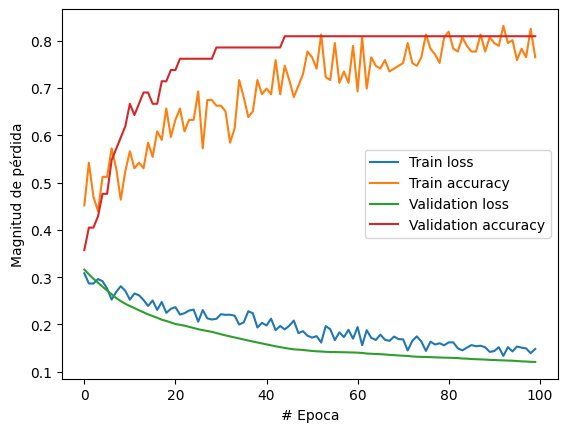

2/2 [==============================] - 0s 5ms/step


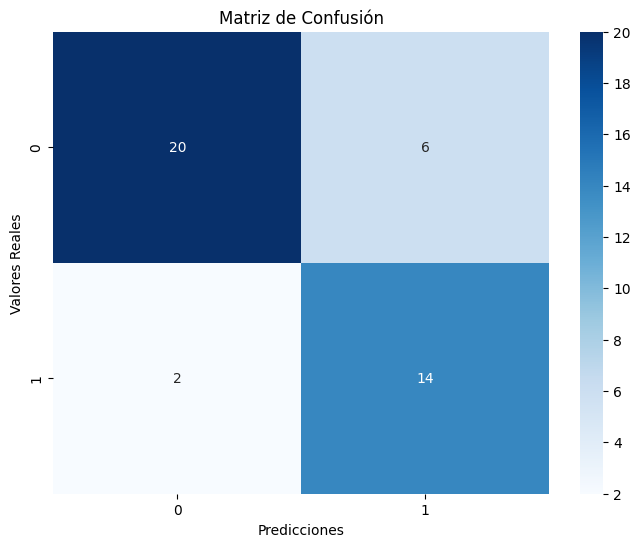

In [36]:
# Reshape X for RNN input (assuming 3D input with samples, time steps, and features)
# You can adjust 'n_steps' based on your sequence length
# Standardize features
X,y = load_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(f'Shape X StandarScaler{X.shape}')

print(f'Factures: {len(X[0])}')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

my_model=Model_Predict_simbol(len(X[0]))
my_model.fill_model((X_train,y_train),(X_test,y_test), metrics=True)

y_predict=my_model.predict(X_test)

Model_Predict_simbol.plt_cofusion_matrix(y_test,y_predict)

Load data shapes:
 x:(208, 60)
 y:(208,)
Shape X StandarScaler(208, 60)
(205, 3, 60)
60
Epoch 1/60
6/6 [==============================] - 4s 292ms/step - loss: 0.7221 - accuracy: 0.5854 - val_loss: 0.6468 - val_accuracy: 0.6341
Epoch 2/60
6/6 [==============================] - 0s 18ms/step - loss: 0.5747 - accuracy: 0.7012 - val_loss: 0.5718 - val_accuracy: 0.7073
Epoch 3/60
6/6 [==============================] - 0s 17ms/step - loss: 0.5000 - accuracy: 0.8110 - val_loss: 0.5217 - val_accuracy: 0.6829
Epoch 4/60
6/6 [==============================] - 0s 33ms/step - loss: 0.4402 - accuracy: 0.8354 - val_loss: 0.4912 - val_accuracy: 0.6829
Epoch 5/60
6/6 [==============================] - 0s 28ms/step - loss: 0.3922 - accuracy: 0.8537 - val_loss: 0.4665 - val_accuracy: 0.6829
Epoch 6/60
6/6 [==============================] - 0s 28ms/step - loss: 0.3520 - accuracy: 0.8780 - val_loss: 0.4425 - val_accuracy: 0.7561
Epoch 7/60
6/6 [==============================] - 0s 21ms/step - loss: 0.3136

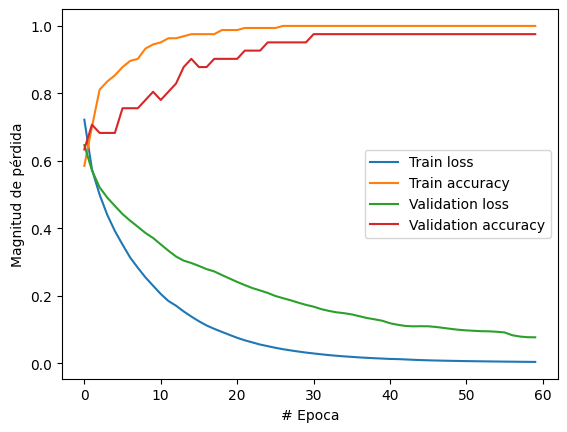

Confusion Matrix:
[[22  1]
 [ 0 18]]
41


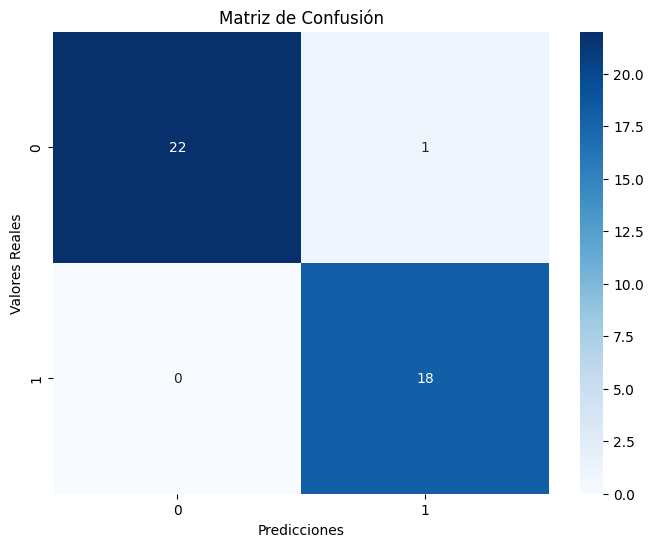

In [37]:
# Reshape X for RNN input (assuming 3D input with samples, time steps, and features)
# You can adjust 'n_steps' based on your sequence length
# Standardize features
X,y = load_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(f'Shape X StandarScaler{X.shape}')

n_steps = 3
X = np.array([X[i:i + n_steps] for i in range(len(X) - n_steps)])
y = y[n_steps:]

print(X.shape)
print(X.shape[2])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, X.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_metrics=model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history_metrics.history["loss"], label='Train loss')
plt.plot(history_metrics.history["accuracy"], label = 'Train accuracy')

plt.plot(history_metrics.history["val_loss"], label = 'Validation loss' )
plt.plot(history_metrics.history["val_accuracy"], label = 'Validation accuracy' )
plt.legend()
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(sum(sum(conf_matrix)))

plt_cofusion_matrix(y_test,y_pred)

    

RNN + LSTM

Load data shapes:
 x:(208, 60)
 y:(208,)
Shape X StandarScaler(208, 60)
(205, 3, 60)
60
Epoch 1/60
6/6 [==============================] - 3s 101ms/step - loss: 0.6471 - accuracy: 0.6037 - val_loss: 0.5908 - val_accuracy: 0.6341
Epoch 2/60
6/6 [==============================] - 0s 15ms/step - loss: 0.5614 - accuracy: 0.7317 - val_loss: 0.5354 - val_accuracy: 0.7073
Epoch 3/60
6/6 [==============================] - 0s 15ms/step - loss: 0.4998 - accuracy: 0.8232 - val_loss: 0.4862 - val_accuracy: 0.7317
Epoch 4/60
6/6 [==============================] - 0s 15ms/step - loss: 0.4479 - accuracy: 0.8476 - val_loss: 0.4422 - val_accuracy: 0.8537
Epoch 5/60
6/6 [==============================] - 0s 14ms/step - loss: 0.3957 - accuracy: 0.8963 - val_loss: 0.4010 - val_accuracy: 0.8537
Epoch 6/60
6/6 [==============================] - 0s 15ms/step - loss: 0.3485 - accuracy: 0.9085 - val_loss: 0.3631 - val_accuracy: 0.8537
Epoch 7/60
6/6 [==============================] - 0s 14ms/step - loss: 0.3051

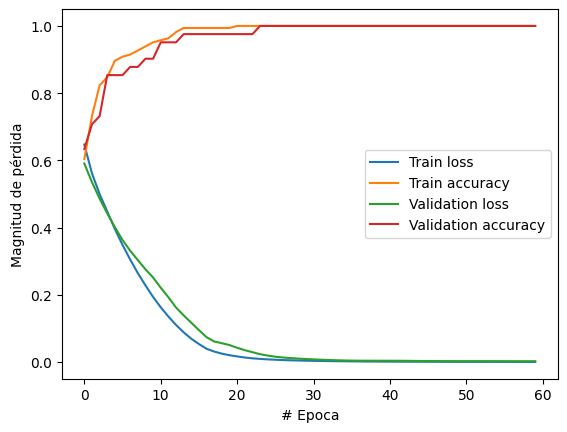

Confusion Matrix:
[[23  0]
 [ 0 18]]
41


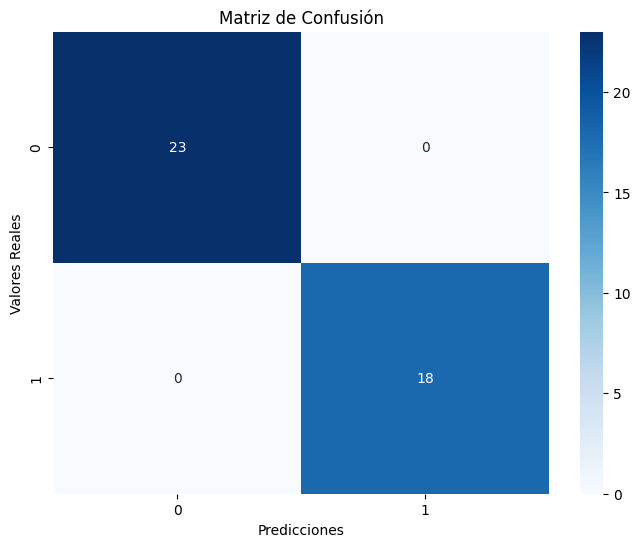

In [38]:
# Separate features (X) and target variable (y)
from tensorflow.keras.layers import LSTM, Dense
X,y = load_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(f'Shape X StandarScaler{X.shape}')

n_steps = 3
X = np.array([X[i:i + n_steps] for i in range(len(X) - n_steps)])
y = y[n_steps:]

print(X.shape)
print(X.shape[2])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, X.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_metrics=model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history_metrics.history["loss"], label='Train loss')
plt.plot(history_metrics.history["accuracy"], label = 'Train accuracy')

plt.plot(history_metrics.history["val_loss"], label = 'Validation loss' )
plt.plot(history_metrics.history["val_accuracy"], label = 'Validation accuracy' )
plt.legend()
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(sum(sum(conf_matrix)))

plt_cofusion_matrix(y_test,y_pred)

Load data shapes:
 x:(208, 60)
 y:(208,)
Shape X StandarScaler(208, 60)
(208, 60)
Epoch 1/100
6/6 [==============================] - 2s 53ms/step - loss: 1.2100 - val_loss: 1.3944
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 1.2037 - val_loss: 1.3871
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 1.1950 - val_loss: 1.3755
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 1.1811 - val_loss: 1.3572
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 1.1609 - val_loss: 1.3297
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 1.1297 - val_loss: 1.2921
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 1.0872 - val_loss: 1.2450
Epoch 8/100
6/6 [==============================] - 0s 12ms/step - loss: 1.0377 - val_loss: 1.1954
Epoch 9/100
6/6 [==============================] - 0s 17ms/step - loss: 0.9867 - val_loss: 1.1538
Epoch 10/100
6/6 [==================

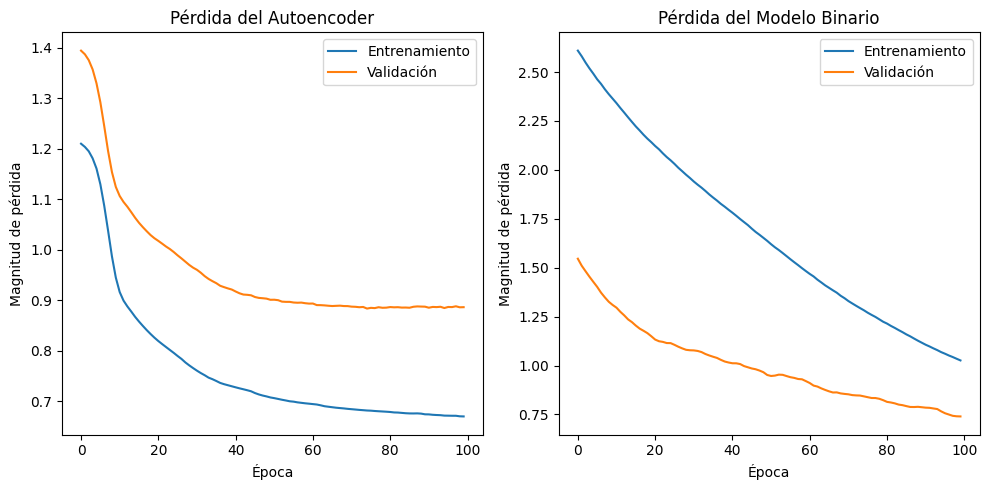

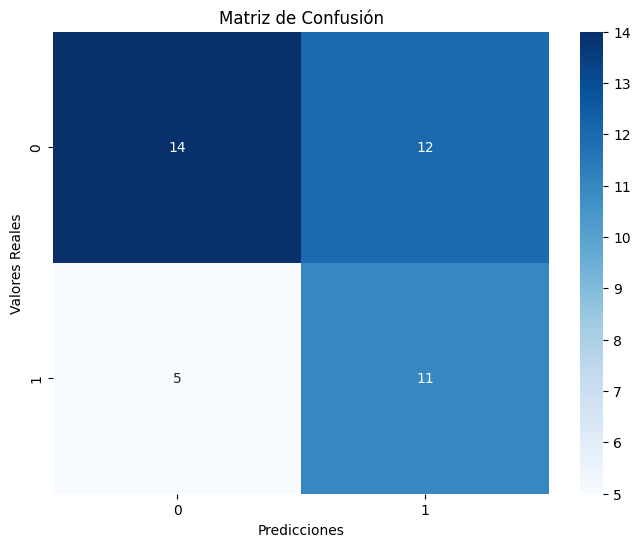

In [39]:
X,y = load_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(f'Shape X StandarScaler{X.shape}')

print(X.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

autoencoder = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X.shape[1], activation='sigmoid')
])

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history_autoencoder=autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test))

# Extract encoder part for feature extraction
encoder = Sequential(autoencoder.layers[:3])  # Adjust based on the number of layers you want to use for encoding

# Freeze the layers in the encoder during fine-tuning
for layer in encoder.layers:
    layer.trainable = False

# Create a binary classification model by adding a dense layer on top of the encoder
binary_model = Sequential([
    encoder,
    Dense(1, activation='sigmoid')
])

# Compile the binary classification model
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model on the binary classification task
history_binary=binary_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred_probs = binary_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


# Visualizar la pérdida del autoencoder
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_autoencoder.history["loss"], label='Entrenamiento')
plt.plot(history_autoencoder.history["val_loss"], label='Validación')
plt.title('Pérdida del Autoencoder')
plt.xlabel('Época')
plt.ylabel('Magnitud de pérdida')
plt.legend()

# Visualizar la pérdida del modelo binario
plt.subplot(1, 2, 2)
plt.plot(history_binary.history["loss"], label='Entrenamiento')
plt.plot(history_binary.history["val_loss"], label='Validación')
plt.title('Pérdida del Modelo Binario')
plt.xlabel('Época')
plt.ylabel('Magnitud de pérdida')
plt.legend()

plt.tight_layout()
plt.show()


plt_cofusion_matrix(y_test,y_pred)



binary classification using an autoencoder with a dedicated classifier on top, you can follow a semi-supervised approach. Here’s an example using TensorFlow and Keras:

Load data shapes:
 x:(208, 60)
 y:(208,)
Shape X StandarScaler (208, 60)
Epoch 1/100
6/6 [==============================] - 2s 55ms/step - loss: 1.2105 - val_loss: 1.3963
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 1.2001 - val_loss: 1.3858
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 1.1877 - val_loss: 1.3724
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 1.1694 - val_loss: 1.3532
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 1.1445 - val_loss: 1.3259
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 1.1072 - val_loss: 1.2908
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 1.0651 - val_loss: 1.2506
Epoch 8/100
6/6 [==============================] - 0s 13ms/step - loss: 1.0202 - val_loss: 1.2127
Epoch 9/100
6/6 [==============================] - 0s 12ms/step - loss: 0.9788 - val_loss: 1.1830
Epoch 10/100
6/6 [===========================

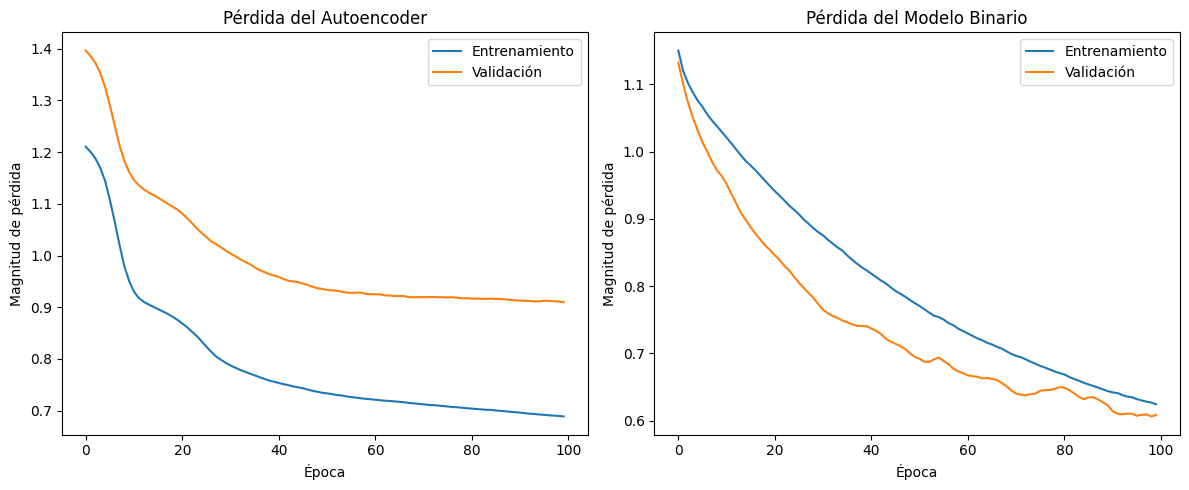

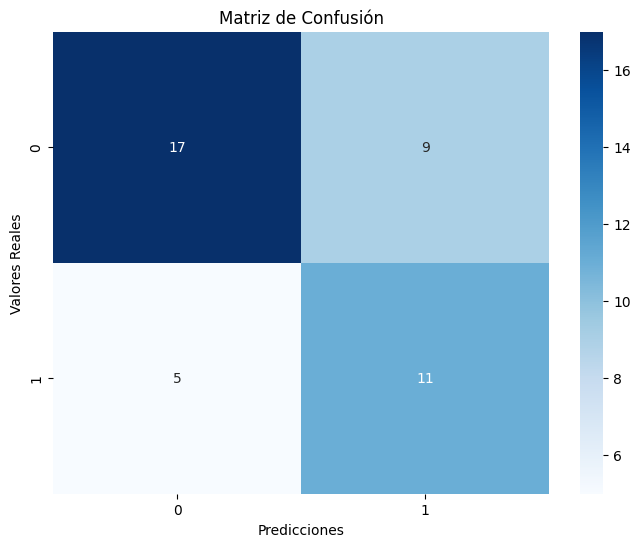

In [40]:
# Preprocesamiento de datos
X, y = load_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(f'Shape X StandarScaler {X.shape}')

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Autoencoder
autoencoder = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X.shape[1], activation='sigmoid')
])

# Compilar el modelo del autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el autoencoder y mostrar la pérdida a lo largo del tiempo
history_autoencoder = autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test))

# Extraer el codificador para la extracción de características
encoder = Sequential(autoencoder.layers[:3])  # Ajustar según el número de capas que desees usar para la codificación

# Congelar las capas del codificador durante el ajuste fino
for layer in encoder.layers:
    layer.trainable = False

# Modelo de clasificación binaria
binary_model = Sequential([
    encoder,
    Dense(1, activation='sigmoid')
])

# Compilar el modelo de clasificación binaria
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ajuste fino del modelo en la tarea de clasificación binaria
history_binary = binary_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Hacer predicciones
y_pred_probs = binary_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Visualizar la pérdida del autoencoder y del modelo binario
plt.figure(figsize=(12, 5))

# Pérdida del autoencoder
plt.subplot(1, 2, 1)
plt.plot(history_autoencoder.history["loss"], label='Entrenamiento')
plt.plot(history_autoencoder.history["val_loss"], label='Validación')
plt.title('Pérdida del Autoencoder')
plt.xlabel('Época')
plt.ylabel('Magnitud de pérdida')
plt.legend()

# Pérdida del modelo binario
plt.subplot(1, 2, 2)
plt.plot(history_binary.history["loss"], label='Entrenamiento')
plt.plot(history_binary.history["val_loss"], label='Validación')
plt.title('Pérdida del Modelo Binario')
plt.xlabel('Época')
plt.ylabel('Magnitud de pérdida')
plt.legend()

plt.tight_layout()
plt.show()


plt_cofusion_matrix(y_test,y_pred)